In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from wordcloud import Wordcloud

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('Data/BA_reviews.csv')

In [4]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Despite being a gold member...
1,1,Not Verified | Regarding the aircraft and seat...
2,2,Not Verified | I travelled with British Airway...
3,3,Not Verified | Food was lousy. Who ever is pl...
4,4,✅ Trip Verified | Had the worst experience. Th...


In [5]:
df['reviews'] = df['reviews'].apply(lambda x: x.split('|')[1].strip())

In [6]:
df['word_count'] = df['reviews'].apply(lambda x:len(x.split()))

In [7]:
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')

In [8]:
df = df.set_index('Unnamed: 0')

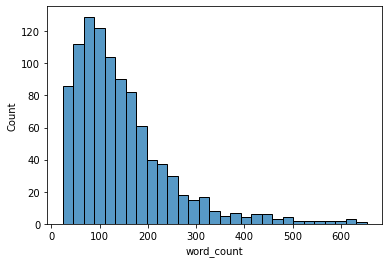

In [9]:
sns.histplot(data=df, x='word_count');

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
import re
from nltk.stem.porter import PorterStemmer

In [11]:
stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [12]:
df['reviews'][0]

'Despite gold member British Airways staff Heathrow literally could care slightest absolute turmoil logistical damage wider impact terrible service All staff members repeat mantra obliged provide even update first 24 hours would make situation better There proactive updates empathy care lot actual lies told You tell given care thought passengers actual individuals show every action word say All better suited working away humans'

In [13]:
df['count_after_stop_words'] = df['reviews'].apply(lambda x:len(x.split()))

In [14]:
df.head()

,reviews,word_count,count_after_stop_words
Unnamed: 0,,,
0,Despite gold member British Airways staff Heat...,121,63
1,Regarding aircraft seat The business class sea...,382,227
2,I travelled British Airways Sweden Los Angeles...,421,219
3,Food lousy Who ever planning Asian Hindu Veget...,99,60
4,Had worst experience The flight London Toronto...,125,64


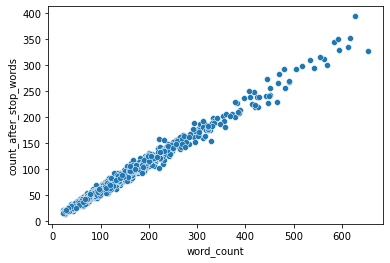

In [15]:
sns.scatterplot(data=df, x='word_count', y='count_after_stop_words');

In [16]:
from wordcloud import WordCloud

In [17]:
all_reviews = ' '.join(df['reviews'])

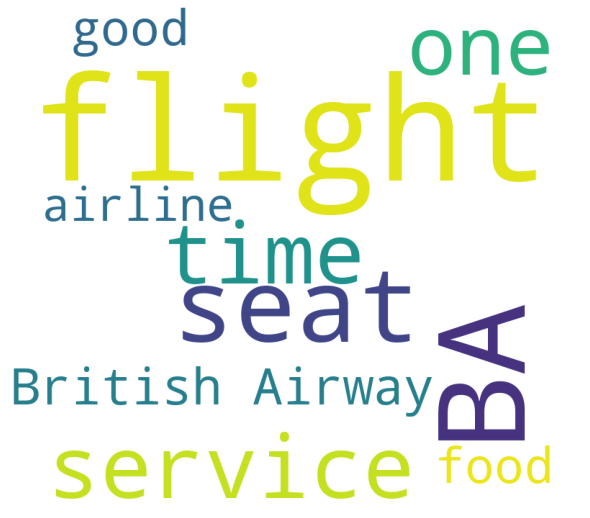

In [35]:
wordcloud = WordCloud(width=800, height=700, background_color='white', max_words=10, 
                      contour_width=3, contour_color='steelblue')

wordcloud.generate(all_reviews)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
vectorizer = TfidfVectorizer()

In [21]:
X_tfidf = vectorizer.fit_transform(df['reviews'])

In [25]:
lda = LatentDirichletAllocation(n_components=3, random_state=1)

In [26]:
lda.fit(X_tfidf)

LatentDirichletAllocation(n_components=3, random_state=1)

In [42]:
topic_weights = lda.transform(X_tfidf)

# Print the top 5 topics for the first 10 documents
for i in range(10):
    print(f"Top 5 topics for document #{i + 1}")
    top_topics = topic_weights[i].argsort()[:-6:-1]
    for j, topic in enumerate(top_topics):
        print(f"Topic #{j + 1}: {topic_weights[i][topic]}")
        print(lda.components_[topic].argsort()[:-11:-1])
    print('\n')

Top 5 topics for document #1
Topic #1: 0.9120817116948137
[3148 7172 1064 6390 4366 3399 6314 2126 3190 1752]
Topic #2: 0.04412416054994523
[3160 4059 3297 4946 1410 4727 1471 5749  841 2794]
Topic #3: 0.04379412775524108
[7901 7483 1235 4224  691 3709 4753  603 4303 4200]


Top 5 topics for document #2
Topic #1: 0.9448331885466915
[3148 7172 1064 6390 4366 3399 6314 2126 3190 1752]
Topic #2: 0.02758394602386221
[3160 4059 3297 4946 1410 4727 1471 5749  841 2794]
Topic #3: 0.02758286542944627
[7901 7483 1235 4224  691 3709 4753  603 4303 4200]


Top 5 topics for document #3
Topic #1: 0.9384425026951021
[3148 7172 1064 6390 4366 3399 6314 2126 3190 1752]
Topic #2: 0.03080139152798328
[7901 7483 1235 4224  691 3709 4753  603 4303 4200]
Topic #3: 0.03075610577691472
[3160 4059 3297 4946 1410 4727 1471 5749  841 2794]


Top 5 topics for document #4
Topic #1: 0.9112538800991498
[3148 7172 1064 6390 4366 3399 6314 2126 3190 1752]
Topic #2: 0.04437424993926783
[3160 4059 3297 4946 1410 4727 1

In [27]:
words = vectorizer.get_feature_names()
for i, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{i + 1}")
    print([words[index] for index in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #1
['entered', 'apologetic', 'realized', 'bunch', 'mothers', 'bringing', 'obliged', 'funeral', 'joked', 'flowers']


Top 10 words for topic #2
['laughs', 'lighter', 'admitted', 'muffled', 'humorous', 'airhostesses', 'lead', 'bengaluru', 'und', 'wir']


Top 10 words for topic #3
['class', 'food', 'crew', 'seat', 'good', 'london', 'service', 'ba', 'the', 'flight']




### From the word cloud, it seems there was alot of reviews about heathrow among all airports
### the business class also seems to have liked sharing a piece of their mind
### Cabin Crew and crew respectively as well as staff/customer service were frequently mentioned
### most reviews related to the time, flight, seat, food, and service.
### 'good' is in the top ten most frequent words in reviews
### reviews appear to have been postive about services and crew, neutral to airhostesses and bad with other customers especially mothers

In [31]:
all_reviews_list = list(all_reviews)

In [34]:
for word in all_reviews_list:
    

0